# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

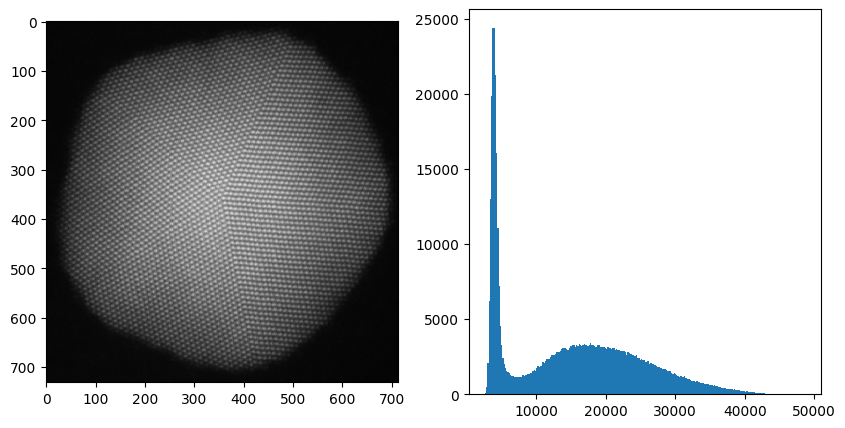

In [3]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
# file = '/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_1atoms.mat'
file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/output_fivefoldsymmetry2015_121416_2.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_330_RevSTEM90_STEMdataset_802x814_3_final_60_rotated.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_O2_after_O2_and_H2_flow_1_1_conv_1_rotated.mat'
# file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_100_final.mat'
# file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_RT_RevSTEM90_STEMdataset_778x842_3_final_64_rotated.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_Aurod_+45_2016.mat'
# file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_100_final.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
# inputStatSTEM = legacyStatSTEM
# outputStatSTEM = legacyStatSTEM
image = inputStatSTEM['obs']
dx = inputStatSTEM['dx']


# image = gaussian_filter(image, 4)

input_coordinates = inputStatSTEM['coordinates']
# output_coordinates = input_coordinates.copy()
# output_coordinates[:,0] = outputStatSTEM['BetaX']/dx 
# output_coordinates[:,1] = outputStatSTEM['BetaY']/dx

from qem.fitting import ImageModelFitting

model=ImageModelFitting(image, pixel_size=dx)

model.import_coordinates(coordinates=input_coordinates/dx-1)
model.remove_peaks_outside_image()
model.plot()

In [5]:
from qem.utils import InteractivePlot
InteractivePlot(peaks_locations=input_coordinates/dx, image=image, tolerance = 10)

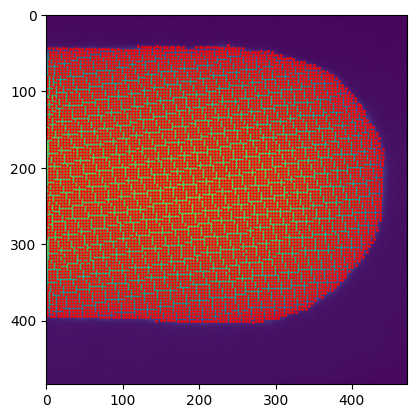

Updated peak locations.


In [2]:
# %matplotlib qt
model.coordinates = model.add_or_remove_peaks(min_distance=2)

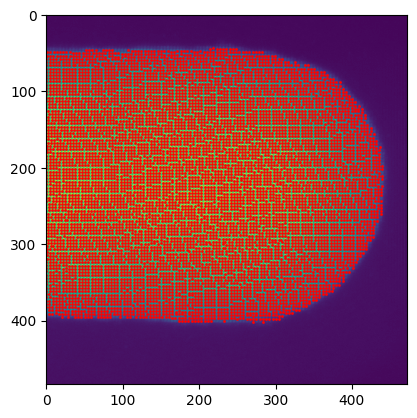

Updated peak locations.


array([[  0., 213.],
       [ 20., 247.],
       [190., 237.],
       ...,
       [218.,  43.],
       [248.,  44.],
       [305., 398.]])

In [2]:
model.find_peaks(threshold_abs=21000,atom_size=0.7)

In [8]:
params = model.init_params(0.5)
params = model.fit_global(params, maxiter=1000, tol=1e-3, verbose=True)


XlaRuntimeError: INTERNAL: Generated function failed: CpuCallback error: KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/interpreters/mlir.py(2415): _wrapped_callback
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/interpreters/pxla.py(1151): __call__
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/profiler.py(336): wrapper
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/pjit.py(1185): _pjit_call_impl_python
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/pjit.py(1229): call_impl_cache_miss
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/pjit.py(1245): _pjit_call_impl
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/core.py(935): process_primitive
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/core.py(447): bind_with_trace
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/core.py(2740): bind
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/pjit.py(168): _python_pjit_helper
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/pjit.py(257): cache_miss
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/traceback_util.py(179): reraise_with_filtered_traceback
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jaxopt/_src/base.py(321): _run
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jaxopt/_src/base.py(359): run
  /home/zzhang/OneDrive/code/qem/qem/fitting.py(465): optimize
  /home/zzhang/OneDrive/code/qem/qem/fitting.py(520): fit_global
  /tmp/ipykernel_60157/1356962770.py(2): <module>
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3553): run_code
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3493): run_ast_nodes
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3311): run_cell_async
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3106): _run_cell
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3051): run_cell
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/zmqshell.py(549): run_cell
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/ipkernel.py(446): do_execute
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/kernelbase.py(775): execute_request
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/ipkernel.py(359): execute_request
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/kernelbase.py(437): dispatch_shell
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/kernelbase.py(531): process_one
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/kernelbase.py(542): dispatch_queue
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/asyncio/events.py(80): _run
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/asyncio/base_events.py(1922): _run_once
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/asyncio/base_events.py(607): run_forever
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/tornado/platform/asyncio.py(195): start
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel/kernelapp.py(739): start
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/traitlets/config/application.py(1075): launch_instance
  /home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/ipykernel_launcher.py(17): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


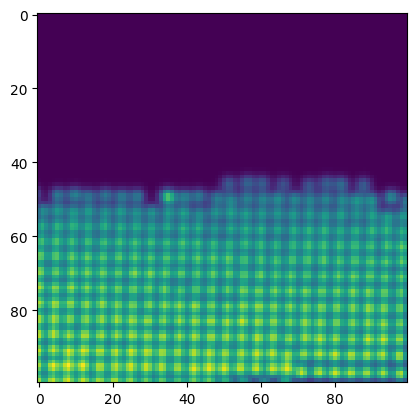

In [4]:
plt.imshow(model.model)

In [5]:
model.fit_local = True
model.fit_background = True
model.model = 'gaussian'
# model.refine_center_of_mass()
# model.fit_global(maxiter=1000, tol=1e-4, step_size = 1e-1, verbose=True)
params = model.init_params()
model.update_params(params)
model.model = model.predict_local(params)
plt.imshow(model.model)
params = model.linear_estimator(params)
model.update_params(params)
model.model = model.predict_local(params)
plt.imshow(model.model)
model.model = model.predict(params,model.X,model.Y)
plt.imshow(model.model)

In [15]:
model.fit_local = True
model.fit_background = True
model.model = 'gaussian'
# model.refine_center_of_mass()
# model.fit_global(maxiter=1000, tol=1e-4, step_size = 1e-1, verbose=True)
params = model.init_params()
# params = model.fit_patch(params, patch_size = 300,buffer_size =40, step_size=1e-2, maxiter=100, tol=1e-3,plot=True, stride_size=300)
params = model.fit_patch(params, patch_size = 100,buffer_size =0, step_size=1e-2, maxiter=10000, tol=1e-3,plot=True, mode='sequential',num_random_patches=10)

  0%|          | 0/1 [00:00<?, ?it/s]

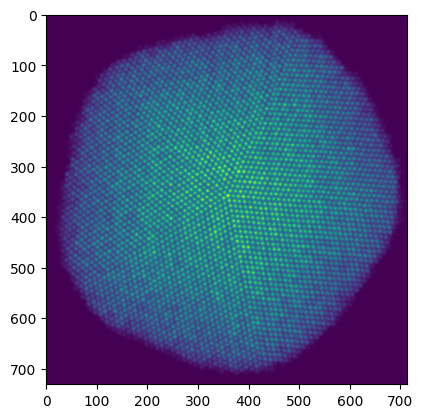

In [5]:
plt.imshow(model.prediction)

In [3]:
model.same_width = False
model.fit_background = True
model.model = 'gaussian'
# model.refine_center_of_mass()
# model.fit_global(maxiter=1000, tol=1e-4, step_size = 1e-1, verbose=True)
params = model.init_params()
# params = model.linear_estimator(params)
params = model.fit_random_batch(params, batch_size= 1000, maxiter=100, tol=1e-2, step_size=1e-2, verbose=False, plot=True, num_epoch = 20)
# params = model.linear_estimator(params)
# model.prediction = model.predict_local(params)
# model.update_params(params)

Fitting random batch:   0%|          | 0/8 [00:00<?, ?it/s]2024-03-14 11:29:42.035972: W external/xla/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 25427771392
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': INTERNAL: no supported devices found for platform CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


In [ ]:
params = model.linear_estimator(params)
model.prediction = model.predict_local(params)

/tmp/ipykernel_4990/3681904157.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


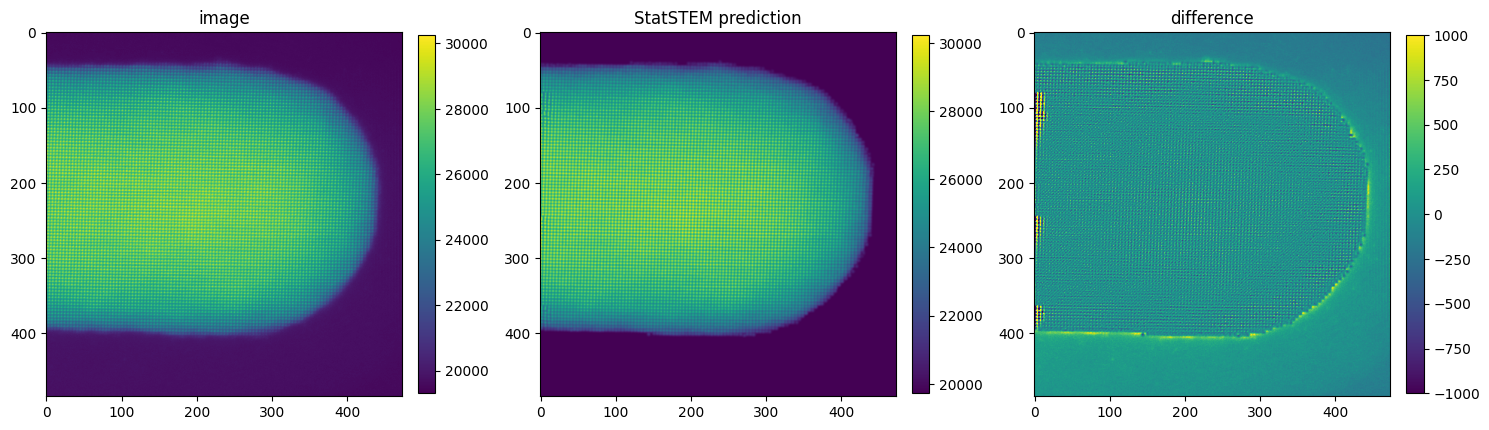

In [3]:
# outputStatSTEM=outputStatSTEM['output']
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
image = inputStatSTEM['obs']
im = plt.imshow( image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(image.min(),image.max())
plt.title('image')
plt.subplot(1,3,2)
im = plt.imshow( outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(image.min(),image.max())
plt.title('StatSTEM prediction')
plt.subplot(1,3,3)
im = plt.imshow( image - outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(-1000,1000)
plt.title('difference')
plt.tight_layout()

In [12]:
# %matplotlib qt5
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
im = plt.imshow( model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(model.image.min(),model.image.max())
plt.title('image')
plt.subplot(1,3,2)
im = plt.imshow(model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.title('QEM prediction')
plt.subplot(1,3,3)
im = plt.imshow( model.image - model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.title('difference')
plt.tight_layout()
plt.clim(-1000,1000)

/tmp/ipykernel_54848/3866741071.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


In [39]:
params['background'] = outputStatSTEM['zeta']
params['height'] = outputStatSTEM['eta']
params['pos_y'] = outputStatSTEM['coordinates'][:,1]/dx 
params['pos_x'] = outputStatSTEM['coordinates'][:,0]/dx 
params['sigma'] = outputStatSTEM['rho']/dx
params = model.linear_estimator(params)
model.update_params(params)
model.prediction = model.predict_local(params)

/tmp/ipykernel_142968/2191646133.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


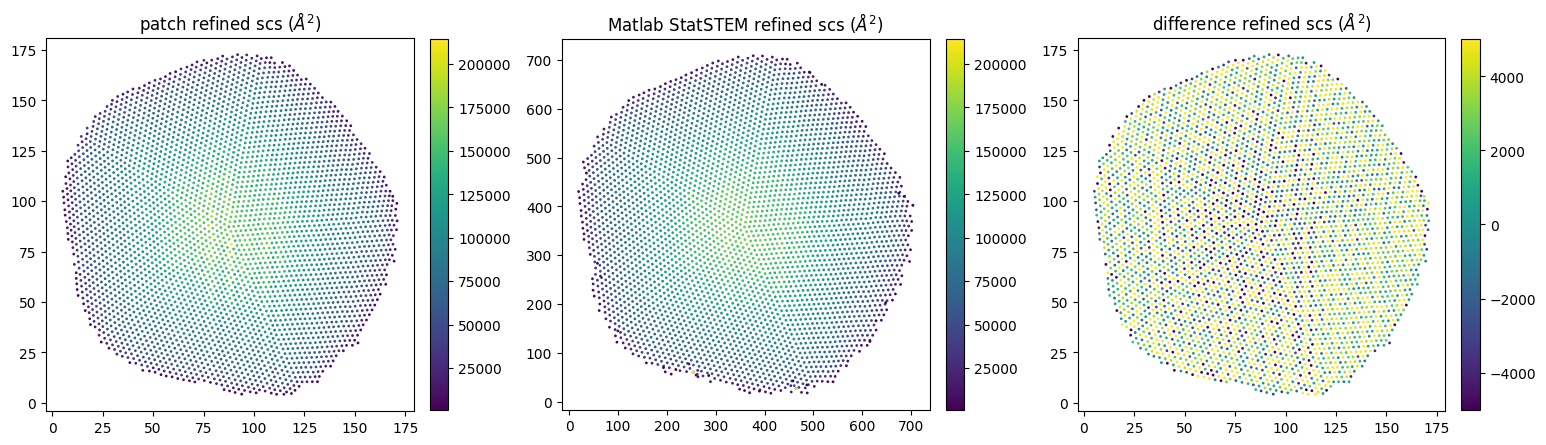

In [19]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
refined_coordinates = model.pos_x, model.pos_y
volume = model.volume
im = plt.scatter(refined_coordinates[0], refined_coordinates[1], c=volume, s=1)
# make aspect ratio equal
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'patch refined scs ($\AA^2$)')
plt.tight_layout()
plt.subplot(1,3,2)
volumes = outputStatSTEM['volumes']
# coord_statstem = outputStatSTEM['coordinates']
coord_statstem = np.array([outputStatSTEM['BetaX']/dx, outputStatSTEM['BetaY']/dx]).T
im = plt.scatter(coord_statstem[:,0], coord_statstem[:,1], c=volumes, s=1)
# threshold = 1.7e5
plt.clim(model.volume.min(),model.volume.max())
# make aspect ratio equal
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'Matlab StatSTEM refined scs ($\AA^2$)')
plt.tight_layout()

plt.subplot(1,3,3)
im = plt.scatter(model.pos_x, model.pos_y, c=outputStatSTEM['volumes']-model.volume, s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'difference refined scs ($\AA^2$)')
plt.clim(-5e3,5e3)

In [17]:
((outputStatSTEM['volumes']-model.volume)/model.volume).mean()

0.004370225189251263

Text(0.5, 1.0, 'Residuals')

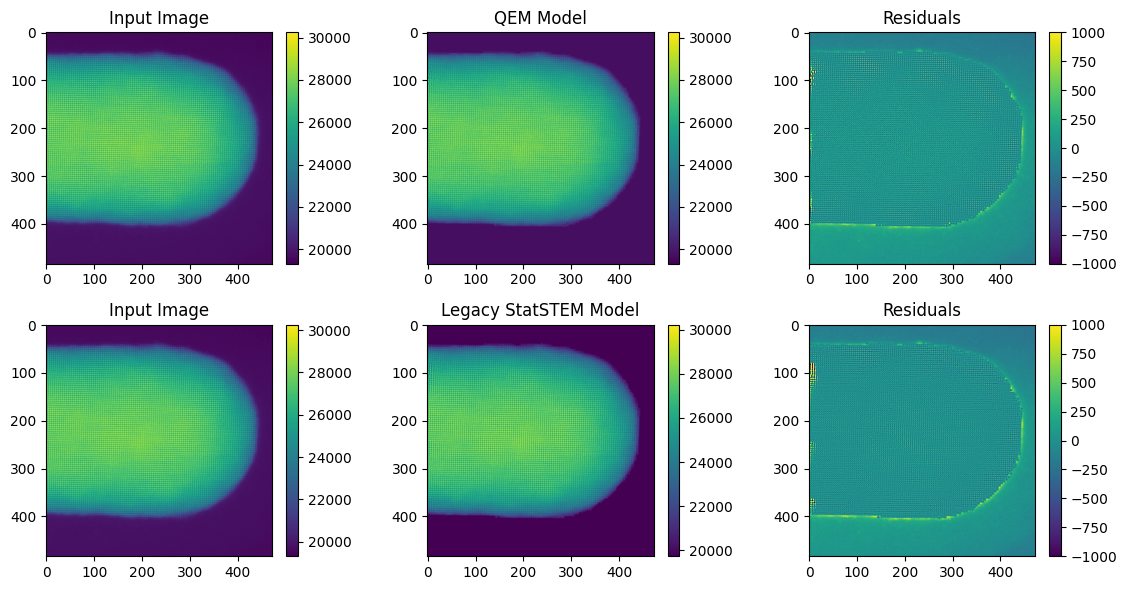

In [7]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.prediction
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

In [12]:
%matplotlib qt5
input_coordinates = model.coordinates
output_coordinates = outputStatSTEM['coordinates']/dx
# output_coordinates = np.array([outputStatSTEM['BetaX']/dx, outputStatSTEM['BetaY']/dx]).T
plt.scatter(input_coordinates[:,0], input_coordinates[:,1], c='r',s=100,alpha=0.5)
plt.scatter(model.pos_x/dx, model.pos_y/dx, c='b', marker='x')
plt.scatter(output_coordinates[:,0], output_coordinates[:,1], c='y', marker='x')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['input coordinates', 'QEM refined coordinates', 'StatSTEM refined coordinates'])


In [8]:
data1= model.volume

data2= outputStatSTEM['volumes']
mask = (data2>0) & (data2<1e6)
data2 = data2[mask]
combined_data = np.concatenate((data1, data2))
min_bin = combined_data.min()
max_bin = combined_data.max()

# Define the bin edges so that both histograms will use the same bins
bins = np.linspace(min_bin, max_bin, 30)

plt.hist(data1, bins=bins, edgecolor='black',label='QEM GPU',color='blue',alpha=0.5)
plt.hist(data2, bins=bins, edgecolor='black',color='red',alpha=0.5, label='Legacy StatSTEM')
# ground_truth = np.sum(image)*dx**2/64
#plot ground truth as a vertical line in red 
# plt.plot([ground_truth,ground_truth],[0,20],'r--',label='Ground truth')
plt.title('Histogram of scs')
plt.xlabel(r'SCS ($\AA^2$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

KeyError: 'volumes'

In [36]:
import numpy as np
from scipy.ndimage import uniform_filter, gaussian_filter

def ssim(img1, img2, C1=6.5025, C2=58.5225):
    """
    Calculate the SSIM (Structural Similarity Index) between two images.
    
    Parameters:
    - img1, img2: Numpy arrays of the same dimension.
    - C1, C2: Variables to stabilize the division with weak denominator.
    
    Returns:
    - The SSIM index.
    """
    
    # Ensure the input images have the same dimensions
    assert img1.shape == img2.shape, "Input images must have the same dimensions"
    
    # Mean of the images
    mu1 = uniform_filter(img1, size=11)
    mu2 = uniform_filter(img2, size=11)
    
    # Variance of the images
    sigma1_sq = uniform_filter(img1 * img1, size=11) - mu1 * mu1
    sigma2_sq = uniform_filter(img2 * img2, size=11) - mu2 * mu2
    
    # Covariance between the images
    sigma12 = uniform_filter(img1 * img2, size=11) - mu1 * mu2
    
    # Calculate the SSIM
    ssim_map = ((2 * mu1 * mu2 + C1) * (2 * sigma12 + C2)) / ((mu1**2 + mu2**2 + C1) * (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

ssim(model.image , outputStatSTEM['model']),ssim(model.image , model.prediction)

(-0.6673563390645052, -0.80695873)

In [ ]:
diff.std(), np.abs(diff).mean()

(Array(2263.3901, dtype=float32), 1607.2849)

In [16]:
diff = model.image - model.prediction
diff = model.image - outputStatSTEM['model']
plt.imshow(diff)
# binning the data into half the size
bin_size = 10
arr = diff
arr = arr[:arr.shape[0]//bin_size*bin_size,:arr.shape[1]//bin_size*bin_size]
arr = arr.reshape(arr.shape[0]//bin_size,bin_size,arr.shape[1]//bin_size,bin_size).mean(axis=1).mean(axis=2)
plt.imshow(arr)
arr.std() + np.abs(arr).mean(), diff.std() +np.abs(diff).mean()
# get the L1 loss of the arr and diff
# np.abs(arr).mean(), np.abs(diff).mean()
arr.std() , diff.std() 


(157.4079216389822, 337.3651329653982)

In [27]:
params =model.fit_global(params)
model.update_params(params)

In [26]:
model.sigma, outputStatSTEM['rho']

(array([0.90314483, 0.90314483, 0.90314483, ..., 0.90314483, 0.90314483,
        0.90314483]),
 array([1.04332908, 1.04332908, 1.04332908, ..., 1.04332908, 1.04332908,
        1.04332908]))